#### Animation of fields

I've added an appropriate colorbar, you can read the explanation at this link: https://joseph-long.com/writing/colorbars/, I also added saving option. Now, if you want to save it as a .gif file just delete '#' symol in corresponding line.

In [175]:
def return_parameters(parameters_file: str):
    with open(parameters_file, 'r') as f:
        TIME_dt_DTS = f.readline().split(' ')
        TIME = (int)(TIME_dt_DTS[0])
        dt = (float)(TIME_dt_DTS[1])
        DTS = (int)(TIME_dt_DTS[2])
        SIZE = f.readline().split(' ')
        SIZE_X = (int)(SIZE[0])
        SIZE_Y = (int)(SIZE[1])
        return TIME, dt, DTS, SIZE_X, SIZE_Y

In [176]:
#TODO: itertools.islice(...)

def return_field_frame(t : int, field_to_read: str):
    with open(field_to_read, 'r') as f:
        next(f)
        next(f)
        for n in range(t):
            next(f) 
            continue
        
        Field = []
        temp = f.readline() 
        temp = temp.split('\t')[:-1]
        for X in range(len(temp)) :
            Field.append(list(map(float, temp[X].split(' ')[:-1])))
        return Field    

In [177]:
import matplotlib.pyplot as plt


def set_imshow(subplot, Field: list, cmap_: str, SIZE_X : int, SIZE_Y : int):
    return subplot.imshow(
        Field,
        cmap = plt.get_cmap(cmap_),
        interpolation="gaussian",
        animated=True,
        origin='lower',
        extent=(0,SIZE_X,0,SIZE_Y),
        #vmin=-0.1, vmax=0.1,
    )

In [178]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

def set_colorbar(mappable):
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=0.05)
    cbar = fig.colorbar(mappable,
                       orientation="vertical",
                       cax=cax)
    plt.sca(last_axes)
    return cbar

In [192]:
import matplotlib.pyplot as plt
%matplotlib inline


def set_whole_frame(axes, cbars, nrows, ncols, F : list, field_titles, imshows, SIZE_X, SIZE_Y):
    for i in range(nrows):
        for j in range(ncols):
            if (i == 0):
                axes[i,j].set_title(field_titles[i*ncols+j], fontsize=20)
                imshows.append(set_imshow(axes[i,j], F[i*ncols+j], "bwr", SIZE_X, SIZE_Y))
                cbars.append(set_colorbar(imshows[i*ncols+j]))
            
            elif(i == 1 and (j == 0 or j == 1)):
                axes[i,j].axis('off')
            
            else:
                axes[i,j].set_title(field_titles[i*ncols+j-2], fontsize=20)
                imshows.append(set_imshow(axes[i,j], F[i*ncols+j-2], "bwr", SIZE_X, SIZE_Y))
                cbars.append(set_colorbar(imshows[i*ncols+j-2]))

def clear_whole_frame(axes, cbars, nrows, ncols):
    for i in range(nrows):
        for j in range(ncols):
            axes[i,j].cla()
            if (i == 0):
                cbars[i*ncols+j].remove()
            elif (i == 1 and j > 1):
                cbars[i*ncols+j-2].remove()

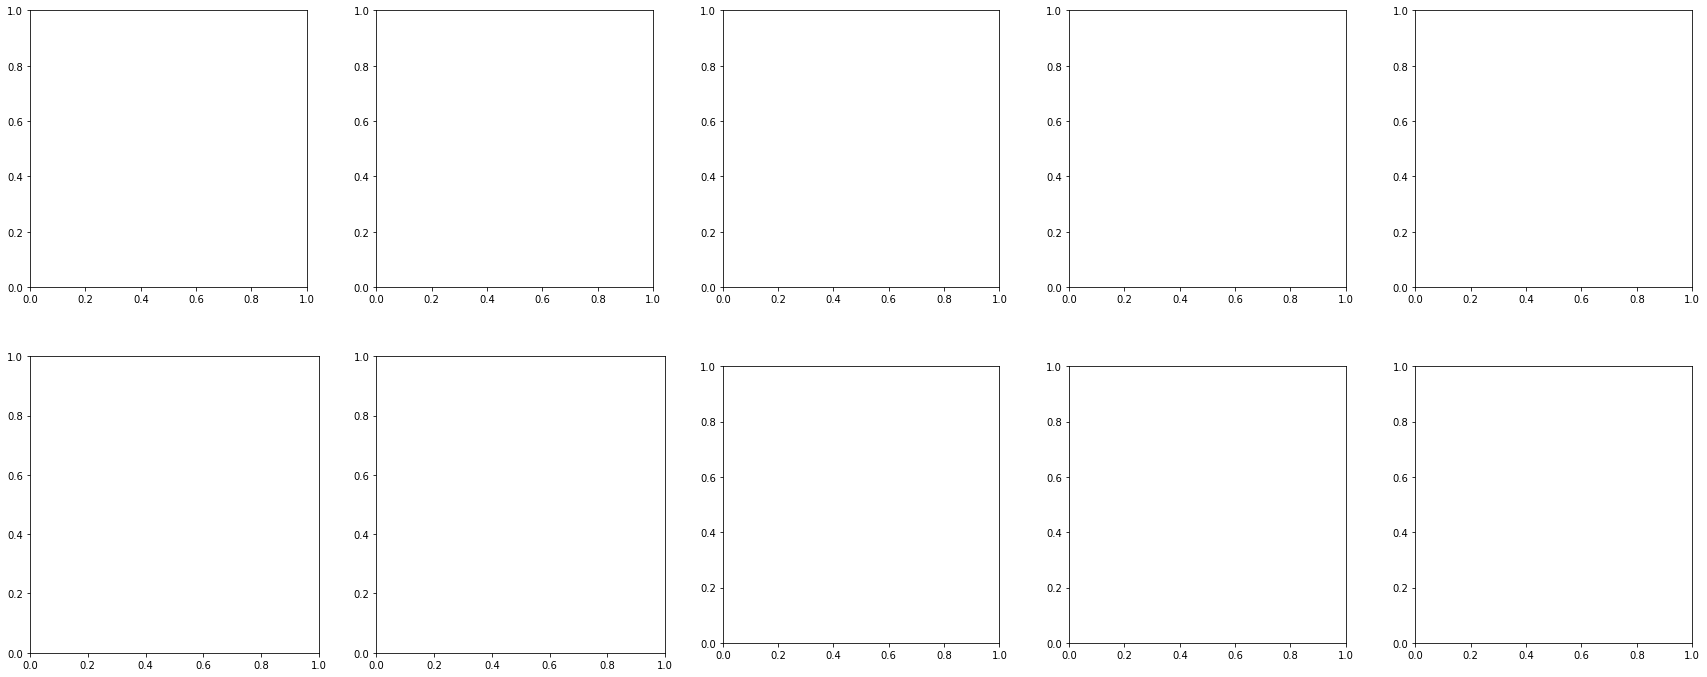

In [199]:
#TODO: python parallel for (☞ﾟヮﾟ)☞

parameters_file = "jx.txt"
TIME, dt, DTS, SIZE_X, SIZE_Y = return_parameters(parameters_file)

field_files = ["jx.txt", "jy.txt",
               "Ex.txt", "Ey.txt", "Ez.txt",
               "Bx.txt", "By.txt", "Bz.txt" ]  

field_titles = [ "$j_x$", "$j_y$",
                 "$E_x$", "$E_y$", "$E_z$",
                 "$B_x$", "$B_y$", "$B_z$" ] 
nrows = 2
ncols = 5

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(35,12))

for t in range(0, int(TIME/DTS)-1):

    F = []
    for file in field_files:
        F.append(return_field_frame(t, file))

    imshows = []
    cbars = []
    set_whole_frame(axes, cbars, nrows, ncols, F, field_titles, imshows, SIZE_X, SIZE_X)

    axes[1,1].text(0.31, 0.9, "%.2f $t\ {\cdot}\ w_p$" %(DTS*t*dt), transform=axes[1,1].transAxes, fontsize=20)

    fig.savefig("animation/%d.png" %t)
    
    clear_whole_frame(axes, cbars, nrows, ncols)